* MODELS

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


In [82]:
df = pd.read_csv('data/data_numeric.csv')

In [83]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [84]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnishingstatus']

feature_y = ['price']

In [85]:
len(df)

545

In [86]:
### Cross validation
X = df[feature_X]
y = df[feature_y]

In [87]:
linear_model = LinearRegression()
score_lm = cross_val_score(linear_model, X, y)
mean_lm = np.mean(score_lm)
print(f'Linear Regression: {mean_lm}')

Linear Regression: -9.910676773077242


In [88]:
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])

-4.320500188719637

In [89]:
from sklearn.linear_model import Ridge
linear_model = Ridge()
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])


-4.360629272247082

In [90]:
(linear_model.predict(X) - y)

,price
0,-5.212976e+06
1,-1.836608e+06
2,-4.649680e+06
3,-3.943203e+06
4,-4.666807e+06
...,...
540,2.059201e+06
541,7.428833e+05
542,1.356846e+06
543,9.518240e+05


In [91]:
score_lm

array([ -1.94277003,  -5.00707214, -16.22431367, -21.10749485,
        -5.27173317])

In [92]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1284724.1363186175
Porcentage error: price    26.951901
dtype: float64


In [93]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1702298.4774188679
Porcentage error: price    35.712087
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [94]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


MSE promedio (Ramdom Forest Regressor): 1491688.0399767342
Porcentage error: price    31.293744
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [95]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 11
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [96]:
clf_model = RandomForestRegressor()
clf_model.fit(X,y)
pd.DataFrame({'columns' : X.columns, 'importance' : clf_model.feature_importances_}).sort_values('importance')

/tmp/ipykernel_369314/2246509998.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_model.fit(X,y)


,columns,importance
4,mainroad,0.009374
5,guestroom,0.016070
7,hotwaterheating,0.017640
6,basement,0.033894
10,prefarea,0.034028
1,bedrooms,0.041959
3,stories,0.051351
11,furnishingstatus,0.056325
9,parking,0.057422
8,airconditioning,0.058629


In [97]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


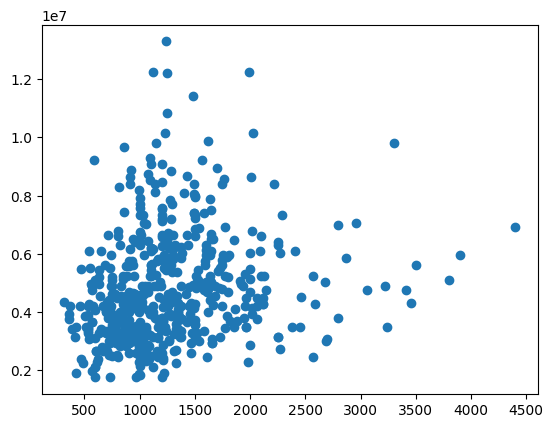

In [98]:
plt.scatter(X['area']/(X['bathrooms']+X['bedrooms']), y)

In [99]:
df = pd.read_csv('data/data_numeric_dummi.csv')
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [100]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]

In [152]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1303485.4240160289
Porcentage error: price    27.345489
dtype: float64


In [102]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1702307.925770633
Porcentage error: price    35.712285
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [103]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-pack

MSE promedio (Ramdom Forest Regressor): 1490834.248383517
Porcentage error: price    31.275832
dtype: float64


In [104]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 13
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [105]:
df = pd.read_csv('data/data_new_features.csv')
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished',
       'stories_area', 'rooms_area'],
      dtype='object')

In [106]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished',
             'stories_area', 'rooms_area']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]

In [107]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1303485.4240160289
Porcentage error: price    27.345489
dtype: float64


In [108]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1520029.7701077275
Porcentage error: price    31.888318
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [109]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-pack

MSE promedio (Ramdom Forest Regressor): 1497096.665861065
Porcentage error: price    31.40721
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [110]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [111]:
linear_model = LinearRegression()

msle_scores_ml = cross_val_score(linear_model, X, np.log(y), scoring='neg_root_mean_squared_error')
lm = np.exp(np.mean(-msle_scores_ml))

print(f'MSLE promedio (Regresión Lineal): {lm}')
print(f'Porcentage error: {lm*100/y.mean()}')

MSLE promedio (Regresión Lineal): 1.2904751340907095
Porcentage error: price    0.000027
dtype: float64


In [112]:
msle_scores_ml

array([-0.36161647, -0.19036939, -0.18359851, -0.18588846, -0.35357952])

In [113]:
# svr_model = SVR(kernel='linear')

# msle_scores_svr = cross_val_score(svr_model, X, np.log(y), scoring='neg_root_mean_squared_error')

# svr = np.exp(np.mean(-msle_scores_svr))

# print(f'MSLE promedio (SVR Regression): {svr}')
# print(f'Porcentage error: {svr*100/(y.mean())}')

In [114]:
clf_model = RandomForestRegressor()

msle_scores_clf = cross_val_score(clf_model, X, np.log(y), scoring='neg_root_mean_squared_error')

clf = np.exp(np.mean(-msle_scores_clf))

print(f'MSLE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-pack

MSLE promedio (Ramdom Forest Regressor): 1.3546764932661501
Porcentage error: price    0.000028
dtype: float64


In [115]:
lgb_model = LGBMRegressor()

msle_scores_lgb = cross_val_score(lgb_model, X, np.log(y), scoring='neg_root_mean_squared_error')

lgb = np.log(np.mean(-msle_scores_lgb))

print(f'MSLE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 15.172985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [116]:
# X_train = X[:400]
# y_train = y[:400]

# X_test = X[400:]
# y_test = y[400:]

In [ ]:
# def log_transform(y):
#     return np.log(y)

# def exp_transform(y):
#     return np.exp(y)

# log_transformer = FunctionTransformer(log_transform)
# exp_transformer = FunctionTransformer(exp_transform)

# pipeline = Pipeline([
#     ('log_transform', log_transformer),
#     ('linear_regression', linear_model),
#     ('exp_transform', exp_transformer)
# ])


# Pipeline.fit(X_train, y_train)

# # Hacer predicciones
# predictions = Pipeline.predict(X_test)

In [119]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,stories_area,rooms_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,2473.333333,1236.666667
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,2240.000000,1120.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,4980.000000,1992.000000
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,3750.000000,1250.000000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,3710.000000,1484.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,3000.000000,1000.000000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,2400.000000,600.000000
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,3620.000000,1206.666667
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,2910.000000,727.500000


In [171]:
df = pd.read_csv('data/data_normal.csv')

In [172]:
feature_X = ['area_normalizada', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished',
             'stories_area', 'rooms_area']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]

In [162]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)
model = LinearRegression()#(solver= 'liblinear')
 
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    # y_train , y_test = y['price'][train_index] , y['price'][test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   


In [163]:
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1303049.0829820014
Porcentage error: price    27.336335
dtype: float64


In [164]:
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train,np.log(y_train))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1236228.5468246823
Porcentage error: price    25.934524
dtype: float64


In [181]:
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    y_train['price'] = np.where((y_train['price'] < lower_limit['price']) | (y_train['price'] > upper_limit['price']), y_train['price'].mean(), y_train['price'])
    
    # print(y_train['price'].mean())
    
    model.fit(X_train,np.log(y_train))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1221852.291005596
Porcentage error: price    25.632928
dtype: float64


In [182]:
## Outliers delete

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)
model = LinearRegression()#(solver= 'liblinear')

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1214512.3885296911
Porcentage error: price    25.478946
dtype: float64


In [183]:
### Lasso - Ridge 
from sklearn.linear_model import Lasso, Ridge

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

lasso_alpha = 0.1  
ridge_alpha = 1.0  

lasso_mse_score = []
ridge_mse_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]

    ### Modelo Lasso
    lasso_model = Lasso(alpha=lasso_alpha)
    lasso_model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values_lasso = lasso_model.predict(X_test)
    pred_values_exp_lasso = np.exp(pred_values_lasso)
    lasso_mse = mean_squared_error(pred_values_exp_lasso, y_test['price'])
    lasso_mse_score.append(np.sqrt(lasso_mse))

    ### Modelo Ridge
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values_ridge = ridge_model.predict(X_test)
    pred_values_exp_ridge = np.exp(pred_values_ridge)
    ridge_mse = mean_squared_error(pred_values_exp_ridge, y_test['price'])
    ridge_mse_score.append(np.sqrt(ridge_mse))

lasso_prom_mse = sum(lasso_mse_score) / k
ridge_prom_mse = sum(ridge_mse_score) / k

print(f'MSE promedio (Lasso): {lasso_prom_mse}')
print(f'Porcentaje de error (Lasso): {lasso_prom_mse * 100 / y.mean()}')

print(f'MSE promedio (Ridge): {ridge_prom_mse}')
print(f'Porcentaje de error (Ridge): {ridge_prom_mse * 100 / y.mean()}')


MSE promedio (Lasso): 1772837.793897542
Porcentaje de error (Lasso): price    37.191913
dtype: float64
MSE promedio (Ridge): 1215038.8891484137
Porcentaje de error (Ridge): price    25.489992
dtype: float64


In [190]:
### Mejoro Ridge
### Lasso - Ridge 
from sklearn.linear_model import Lasso, Ridge

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

ridge_alpha = 1

ridge_mse_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    ### Modelo Ridge
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train, np.log(y_train))

    pred_values_ridge = ridge_model.predict(X_test)
    pred_values_exp_ridge = np.exp(pred_values_ridge)
    
    ridge_mse = mean_squared_error(pred_values_exp_ridge, y_test['price'])
    ridge_mse_score.append(np.sqrt(ridge_mse))

ridge_prom_mse = sum(ridge_mse_score) / k

print(f'MSE promedio (Ridge): {ridge_prom_mse}')
print(f'Porcentaje de error (Ridge): {ridge_prom_mse * 100 / y.mean()}')

MSE promedio (Ridge): 1232999.6672611148
Porcentaje de error (Ridge): price    25.866786
dtype: float64


In [194]:
### Random Forest
model = RandomForestRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Random FOrest Regressor): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

/tmp/ipykernel_369314/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtere

MSE promedio (Random FOrest Regressor): 1424073.6538835901
Porcentage error: price    29.875279
dtype: float64


In [199]:
fi = pd.DataFrame()
fi['Columns'] = X.columns.tolist()
fi['Feature_importances'] = (model.feature_importances_).tolist()

In [202]:
fi = fi.sort_values('Feature_importances', ascending=False)

In [207]:
fi

,Columns,Feature_importances
0,area_normalizada,0.386355
14,stories_area,0.123421
2,bathrooms,0.110761
15,rooms_area,0.087178
9,parking,0.047138
8,airconditioning,0.042366
10,prefarea,0.030533
6,basement,0.027271
1,bedrooms,0.023799
5,guestroom,0.023023


In [216]:
fi_filtrado = fi[fi['Feature_importances'] > 0.015]

In [210]:
fi_filtrado['Columns'].tolist()

['area_normalizada',
 'stories_area',
 'bathrooms',
 'rooms_area',
 'parking',
 'airconditioning',
 'prefarea',
 'basement',
 'bedrooms',
 'guestroom',
 'hotwaterheating']

In [217]:
feature_X_fi = fi_filtrado['Columns'].tolist()

X_fi = df[feature_X_fi]


In [218]:
### Random Forest - Feature importances
model = RandomForestRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X_fi):
    X_train , X_test = X_fi.iloc[train_index,:].copy(), X_fi.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Random FOrest Regressor): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

/tmp/ipykernel_369314/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_369314/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtere

MSE promedio (Random FOrest Regressor): 1440435.248897909
Porcentage error: price    30.218525
dtype: float64


In [193]:
#### Light GBM
model = LGBMRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Light GBM): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 15.172985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Modelo elegido: Linear Regressor

Cross Validation: K-fold

Outliers: delete

Hyperparameters: ... 


In [242]:
param_grid = [
  {'C': [1, 0.5, 5, 0.01, 10], 'kernel': ['linear'], 'epsilon': [0.1, 0.5, 0.01, 1, 0.001]}]

In [241]:
model = SVR(kernel='linear', C=5, epsilon=0.0001)

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   

print(f'MSLE promedio (SVR Regression): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/(y.mean())}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

MSLE promedio (SVR Regression): 1179608.2376788869
Porcentage error: price    24.746701
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Falta hacer
* Hyperparameters search

Hechos
* Lasso 
* Ridge
* Remove outliers 
* Feature important, feature selection
